<a href="https://colab.research.google.com/github/aukarthik/fraud-detection/blob/main/CreditCardFraudDetection_COMP161_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle


%matplotlib inline

In [ ]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df.columns = df.columns.str.lower() # Lowe case all the columns
df

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Pre processing

## Studying the data set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

In [ ]:
# Unique value count
print(df["class"].value_counts())

class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
print(df["class"].value_counts(normalize=True)) #Precentages

class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


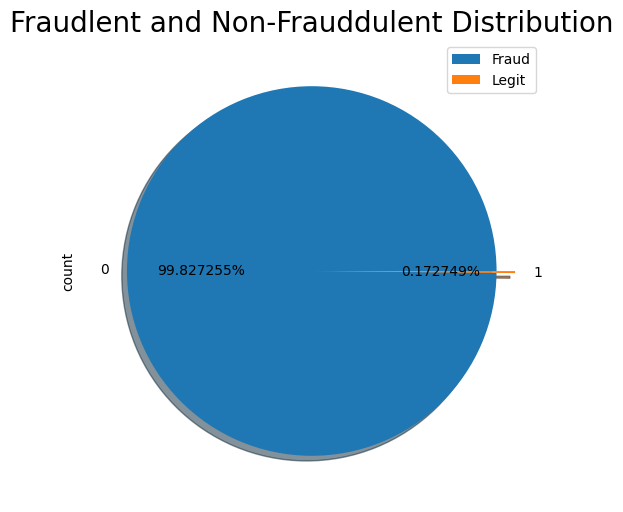

In [ ]:
df["class"].value_counts().plot(kind="pie",explode=[0,0.1],figsize=(6,6),autopct="%1f%%",shadow=True)
plt.title("Fraudlent and Non-Frauddulent Distribution", fontsize=20)
plt.legend(["Fraud","Legit"])
plt.show()

In [ ]:
df[['time','amount']].describe()

,time,amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [ ]:
#Finding null value
df.isnull().sum()

,0
time,0
v1,0
v2,0
v3,0
v4,0
v5,0
v6,0
v7,0
v8,0
v9,0


## Feature Engineering

In [ ]:
# Converting time second to hour
df['time'] = df['time'].apply(lambda sec:(sec/3600))

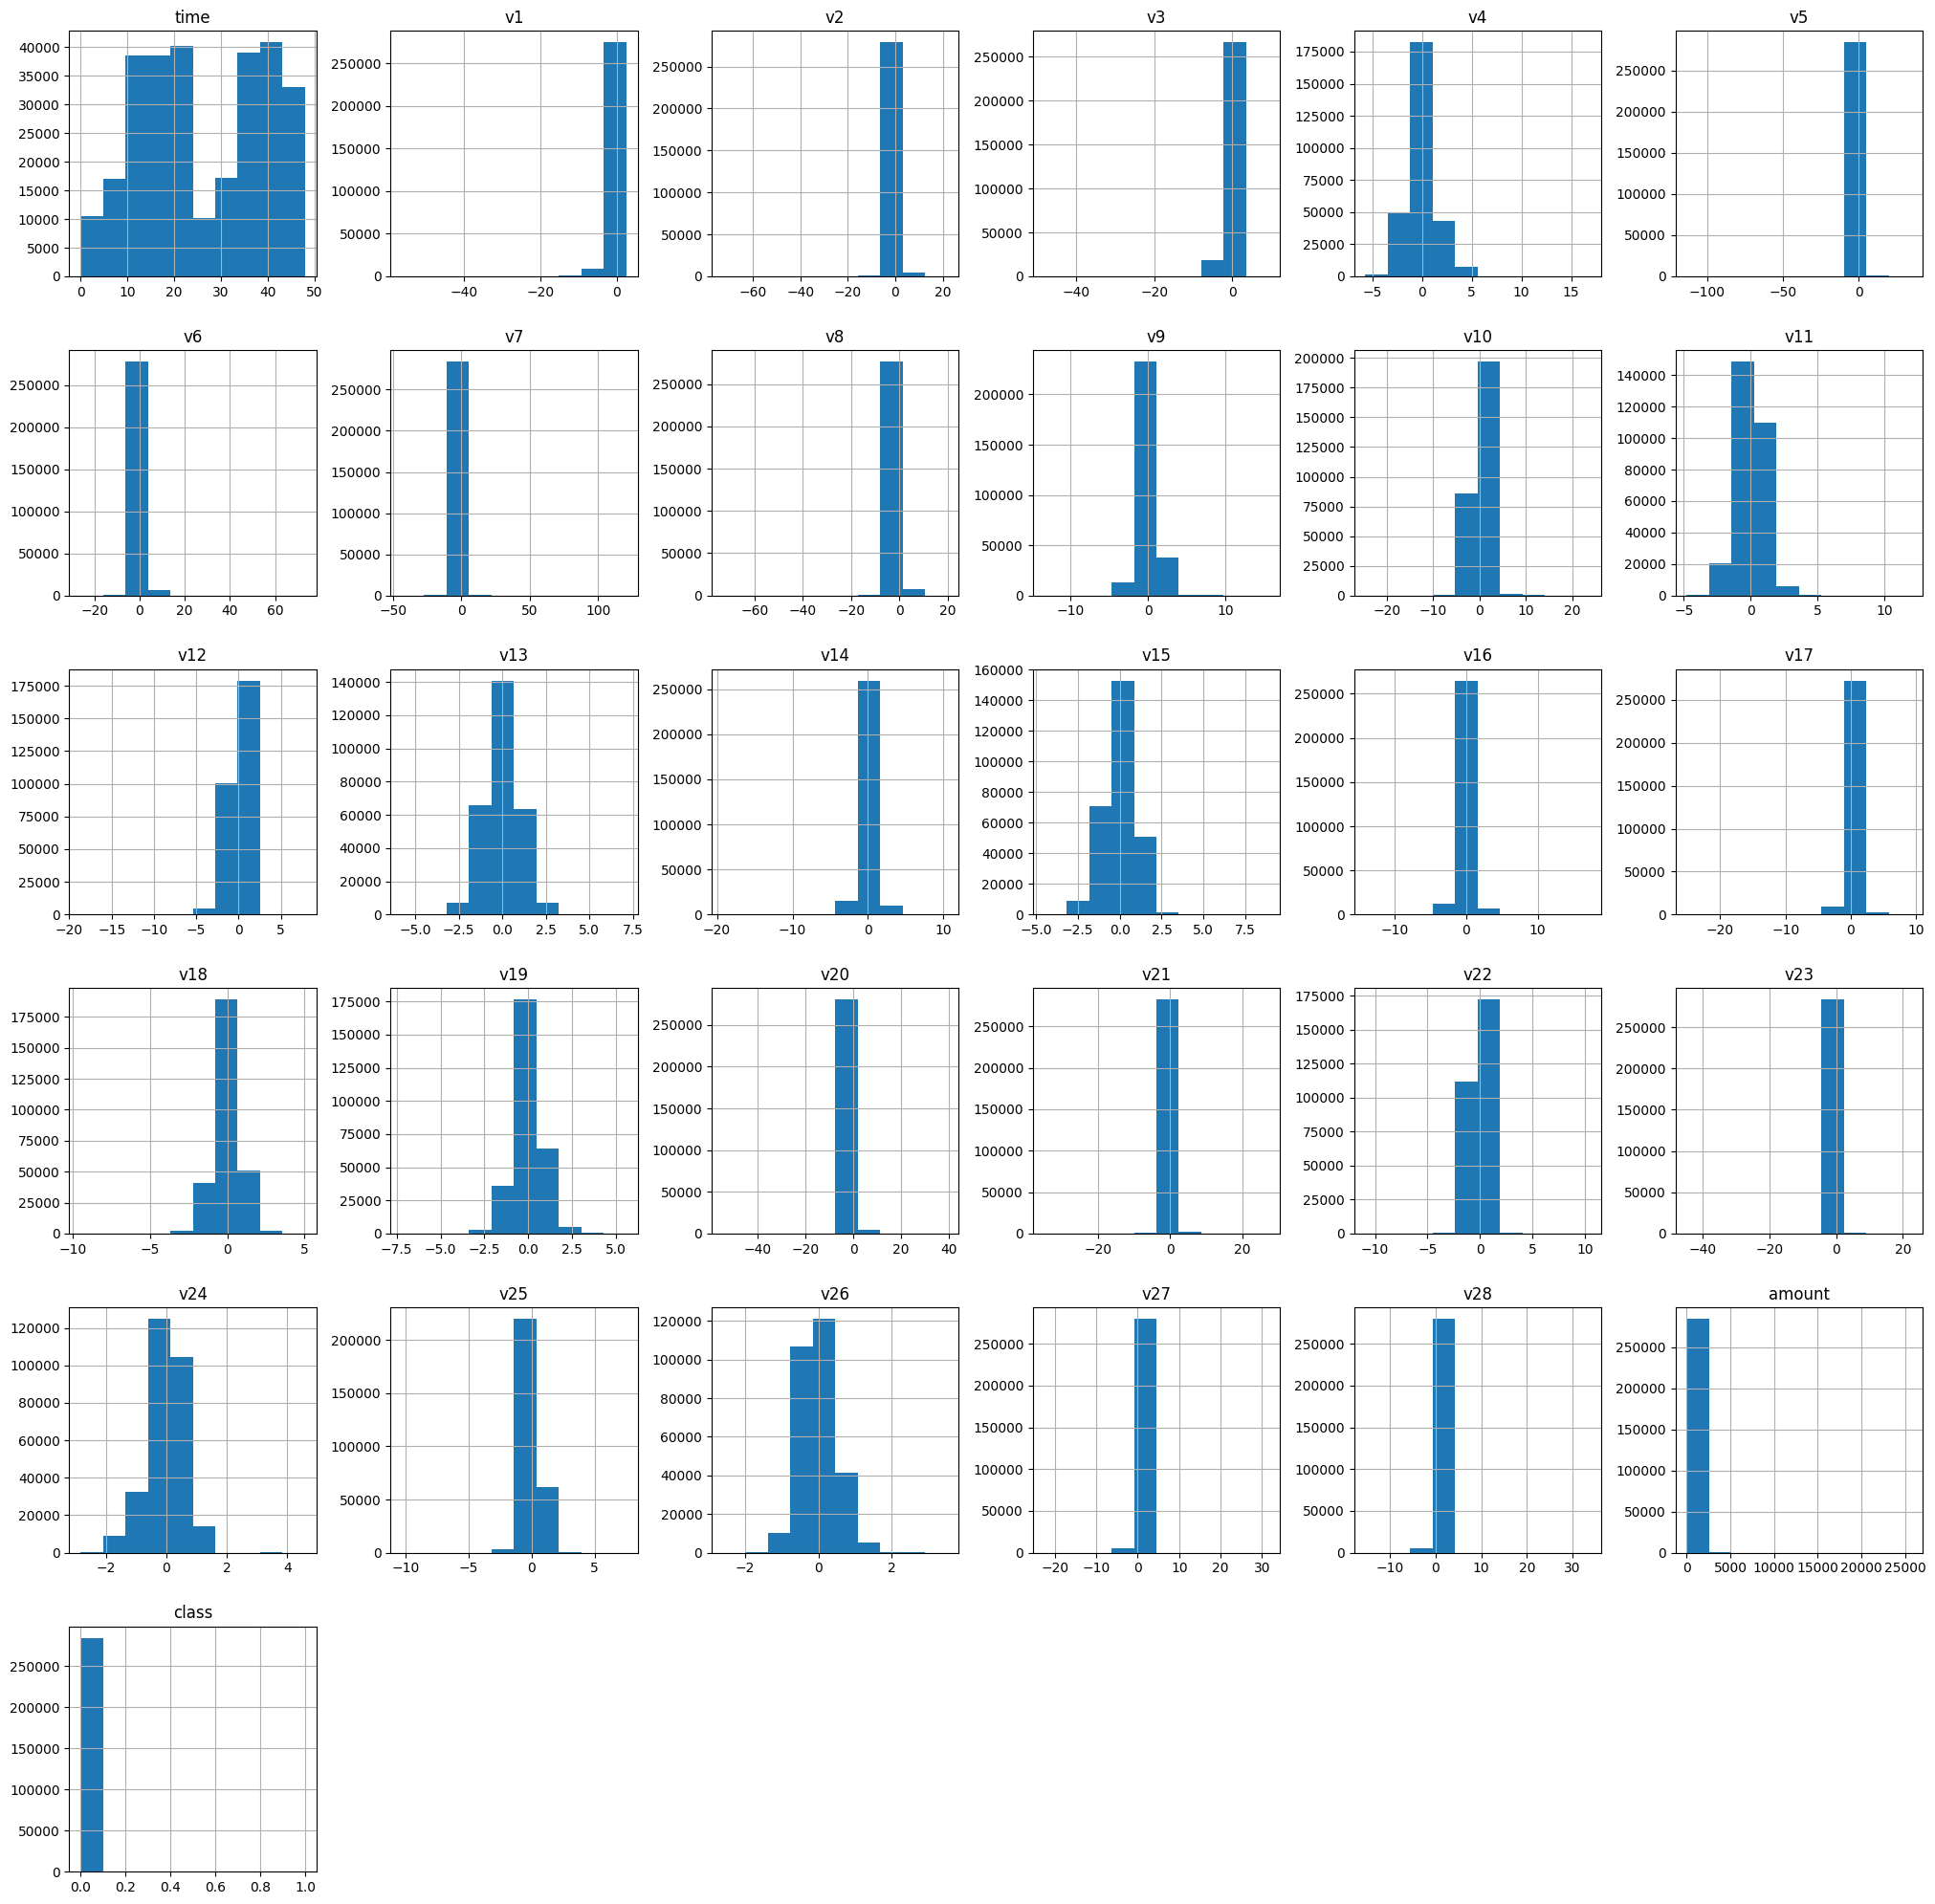

In [ ]:
# Visualising Data for detecting any partivular pattern or Anomaly unisng Historigram Plots
df.hist(figsize = (25,25))
plt.show()

In [ ]:
df.reset_index(inplace=True, drop = True)

### Scale Amount Feature

In [ ]:
# Scale amount by log
df['amount_log'] = np.log(df.amount+0.0001) #Avoid zero error

### Spliting Traing and Testing Sample

In [ ]:
#Drop unecessary features
X = df.drop(['time','class','amount'], axis=1)
y=df['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.30,shuffle=True, random_state=101)

In [ ]:
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (199364, 29)
y_train -  (199364,)
X_test -  (85443, 29)
y_test -  (85443,)


# Baseline for model to select the Sampling technique

### 1.1 Logistc Regression with imbalanced data

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

### Model Valuation

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion Matrix
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.90      0.60      0.72       144

    accuracy                           1.00     85443
   macro avg       0.95      0.80      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
print('Precision: {0:0.5f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {0:0.5f}'.format(metrics.recall_score(y_test,y_pred)))
print('F1: {0:0.5f}'.format(metrics.f1_score(y_test,y_pred)))
# Otheres
print('\nOthers:')
print('Accurecy: {0:0.5f}'.format(metrics.accuracy_score(y_test,y_pred)))
print('AUC: {0:0.5f}'.format(metrics.roc_auc_score(y_test, y_pred)))


Precision: 0.89691
Recall: 0.60417
F1: 0.72199

Others:
Accurecy: 0.99922
AUC: 0.80202


In [ ]:
#Confusion Matrix

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

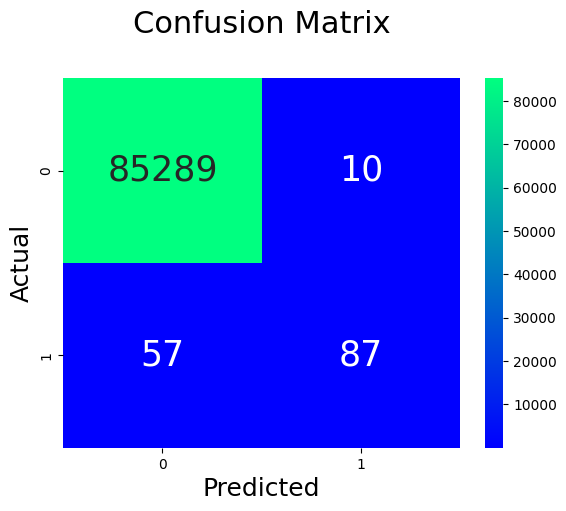

In [ ]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25},cmap="winter",fmt="g")

plt.title("Confusion Matrix", y=1.1, fontsize=22)
plt.ylabel("Actual", fontsize=18)
plt.xlabel('Predicted', fontsize=18)

plt.show()

# Class Imbalance

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

## 1.2 Logist Regression with Rnadom Undersampling

In [ ]:
from collections import Counter # Take values return value cound dictionary

In [ ]:
print('Original dataset shape %s'% Counter(y_train))

# Undersamplying only on train
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({0: 199016, 1: 348})
Resampled dataset shape Counter({0: 348, 1: 348})


In [ ]:
# Undersampling with Logist Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_rus, y_train_rus)

y_pred_rus = lr_model.predict(X_test)

In [ ]:
print("Precision: {0:0.5f}".format(metrics.precision_score(y_test,y_pred_rus)))
print("Recall: {0:0.5f}".format(metrics.recall_score(y_test,y_pred_rus)))
print("F1: {0:0.5f}".format(metrics.f1_score(y_test,y_pred_rus)))
print("Accurecy :{0:0.5f}".format(metrics.accuracy_score(y_test,y_pred_rus)))
print("AUC :{0:0.5f}".format(metrics.roc_auc_score(y_test,y_pred_rus)))

Precision: 0.05615
Recall: 0.90972
F1: 0.10577
Accurecy :0.97408
AUC :0.94195


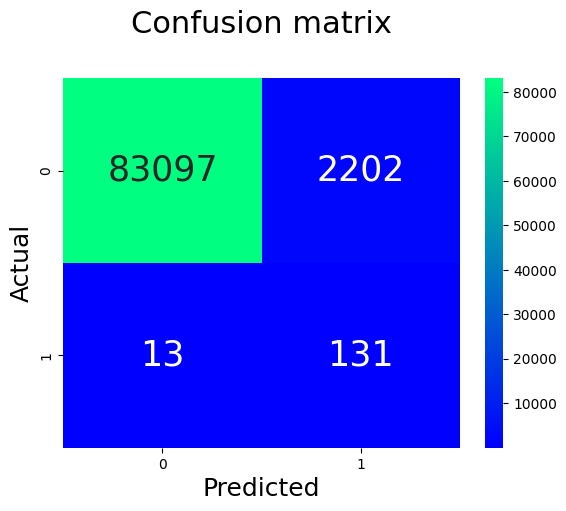

In [ ]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rus)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size":25}, cmap="winter",fmt="g")
plt.title("Confusion matrix", y=1.1, fontsize=22)
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize = 18)
plt.show()

## 1.3. Logist Regretion with Random Oversampling technique

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
print("Original  dataset %s"%Counter(y_train))
ros= RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print('Resampled dateset shape %s'%Counter(y_train_ros))

Original  dataset Counter({0: 199016, 1: 348})
Resampled dateset shape Counter({0: 199016, 1: 199016})


In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train_ros, y_train_ros)
y_pred_ros = lr_model.predict(X_test)

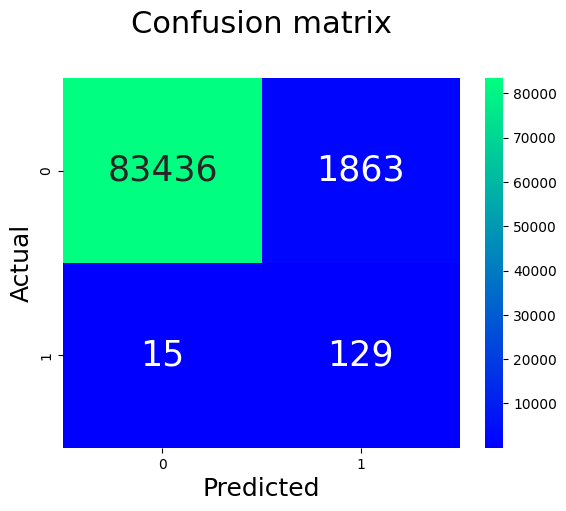

In [ ]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_ros)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True, annot_kws={"size":25},cmap="winter",fmt="g")
plt.title("Confusion matrix", y=1.1, fontsize=22)
plt.xlabel("Predicted",fontsize = 18)
plt.ylabel("Actual", fontsize = 18)
plt.show()

## Logist Regression with SMOTE data

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

In [ ]:
print('Original dataset shape %s' % Counter(y_train))
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 199016, 1: 348})
Resampled dataset shape Counter({0: 199016, 1: 199016})


In [ ]:
# SMOTE Sampling with Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_smote, y_train_smote)
y_pred_smote = lr_model.predict(X_test)

In [ ]:
print("Precision : {0:.5f}".format(metrics.precision_score(y_test,y_pred_smote)))
print("Recal : {0:.5f}".format(metrics.recall_score(y_test,y_pred_smote)))
print("F1 : {0:.5f}".format(metrics.f1_score(y_test,y_pred_smote)))
print("Accuracy: {0:.5f}".format(metrics.accuracy_score(y_test,y_pred_smote)))
print("AUC : {0:.5f}".format(metrics.roc_auc_score(y_test,y_pred_smote)))

Precision : 0.05956
Recal : 0.89583
F1 : 0.11169
Accuracy: 0.97598
AUC : 0.93598


## Logist Regression with ADASYN data

In [ ]:
print('Original dataset shape %s' % Counter(y_train))
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train,y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 199016, 1: 348})
Resampled dataset shape Counter({0: 199016, 1: 199012})


In [ ]:
# SMOTE Sampling with Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = lr_model.predict(X_test)

In [ ]:
print("F1 : {0:.5f}".format(metrics.f1_score(y_test,y_pred_adasyn)))
print("Precision : {0:.5f}".format(metrics.precision_score(y_test,y_pred_adasyn)))
print("Recal : {0:.5f}".format(metrics.recall_score(y_test,y_pred_adasyn)))
print("\n")

F1 : 0.03768
Precision : 0.01923
Recal : 0.94444




# Build the Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xg

In [ ]:
import time

In [ ]:
names_lst = []

# Performance lists
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []

# Cost
FP_cost = 5
FN_cost = 50

costs_lst = []
time_lst = []

best_param_list = []

# Function for model building and performance measure
def build_measure_model(models, hyper_tunned=False):

  for name, model, X_train, y_train, X_test, y_test in models:
    names_lst.append(name)

    model.fit(X_train, y_train)

    start_pred_time = time.time() #TIme
    y_test_pred = model.predict(X_test)
    end_pred_time = time.time() #Time

    # Gettin the time
    pred_time = end_pred_time - start_pred_time
    time_lst.append(pred_time)

    # Precision
    Precision_test = metrics.precision_score(y_test, y_test_pred)
    precision_test_lst.append(Precision_test)
    # Recall
    Recall_test = metrics.recall_score(y_test, y_test_pred)
    recall_test_lst.append(Recall_test)
    # F1
    F1_test = metrics.f1_score(y_test, y_test_pred)
    f1_test_lst.append(F1_test)



    # Confusion Matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

    # Cost
    tn, fp, fn, tp = cnf_matrix.ravel()
    # Compute total cost
    total_cost = (fp * FP_cost) + (fn * FN_cost)
    costs_lst.append(total_cost)

    print("Model:", name)
    print("Test Precision: {0:0.5f}".format(Precision_test))
    print("Test Recall: {0:0.5f}".format(Recall_test))
    print("Test F1: {0:0.5f}".format(F1_test))

    print("Confusion Matrix: \n", cnf_matrix)
    print("\n")

    # Saving model
    # save the model
    filename = name+'.pkl'
    with open(filename, 'wb') as f:
      pickle.dump(model, f)

    if hyper_tunned:
      best_parm = model.best_params_
      best_parm['name'] = name
      best_param_list.append(best_parm)

## Logistic Regression (LR)

In [ ]:
LRmodels = []
lr = LogisticRegression()
LRmodels.append(('LR imbalance', lr,X_train,y_train,X_test,y_test))
LRmodels.append(('LR Undersampling', lr,X_train_rus,y_train_rus,X_test,y_test))
LRmodels.append(('LR Oversampling', lr,X_train_ros,y_train_ros,X_test,y_test))
LRmodels.append(('LR SMOTE',lr,X_train_smote,y_train_smote,X_test,y_test))
LRmodels.append(('LR ADASYN', lr,X_train_adasyn,y_train_adasyn,X_test,y_test))

build_measure_model(LRmodels)

Model: LR imbalance
Test Precision: 0.89691
Test Recall: 0.60417
Test F1: 0.72199
Confusion Matrix: 
 [[85289    10]
 [   57    87]]


Model: LR Undersampling
Test Precision: 0.05615
Test Recall: 0.90972
Test F1: 0.10577
Confusion Matrix: 
 [[83097  2202]
 [   13   131]]


Model: LR Oversampling
Test Precision: 0.06476
Test Recall: 0.89583
Test F1: 0.12079
Confusion Matrix: 
 [[83436  1863]
 [   15   129]]


Model: LR SMOTE
Test Precision: 0.05956
Test Recall: 0.89583
Test F1: 0.11169
Confusion Matrix: 
 [[83262  2037]
 [   15   129]]


Model: LR ADASYN
Test Precision: 0.01923
Test Recall: 0.94444
Test F1: 0.03768
Confusion Matrix: 
 [[78361  6938]
 [    8   136]]




In [ ]:
DTmodels = []

dt = DecisionTreeClassifier()

DTmodels.append(('DT imbalance',dt,X_train,y_train,X_test,y_test))
DTmodels.append(('DT Undersampling', dt,X_train_rus,y_train_rus,X_test,y_test))
DTmodels.append(('DT Oversampling',dt,X_train_ros,y_train_ros,X_test,y_test))
DTmodels.append(('DT SMOTE', dt,X_train_smote,y_train_smote,X_test,y_test))
DTmodels.append(('DT ADASYN', dt,X_train_adasyn,y_train_adasyn,X_test,y_test))

build_measure_model(DTmodels)

Model: DT imbalance
Test Precision: 0.70779
Test Recall: 0.75694
Test F1: 0.73154
Confusion Matrix: 
 [[85254    45]
 [   35   109]]


Model: DT Undersampling
Test Precision: 0.01386
Test Recall: 0.90278
Test F1: 0.02730
Confusion Matrix: 
 [[76050  9249]
 [   14   130]]


Model: DT Oversampling
Test Precision: 0.82114
Test Recall: 0.70139
Test F1: 0.75655
Confusion Matrix: 
 [[85277    22]
 [   43   101]]


Model: DT SMOTE
Test Precision: 0.41538
Test Recall: 0.75000
Test F1: 0.53465
Confusion Matrix: 
 [[85147   152]
 [   36   108]]


Model: DT ADASYN
Test Precision: 0.44706
Test Recall: 0.79167
Test F1: 0.57143
Confusion Matrix: 
 [[85158   141]
 [   30   114]]




In [ ]:
RFmodels = []
rf=RandomForestClassifier()
RFmodels.append(('RF imbalance', rf, X_train,y_train,X_test,y_test))
RFmodels.append(('RF Undersampling', rf,X_train_rus,y_train_rus,X_test,y_test))
RFmodels.append(('RF Oversampling',rf,X_train_ros,y_train_ros,X_test,y_test))
RFmodels.append(('RF SMOTE',rf,X_train_smote,y_train_smote,X_test,y_test))
RFmodels.append(('RF ADASYN',rf,X_train_adasyn,y_train_adasyn,X_test,y_test))

build_measure_model(RFmodels)

Model: RF imbalance
Test Precision: 0.93496
Test Recall: 0.79861
Test F1: 0.86142
Confusion Matrix: 
 [[85291     8]
 [   29   115]]


Model: RF Undersampling
Test Precision: 0.04280
Test Recall: 0.88194
Test F1: 0.08165
Confusion Matrix: 
 [[82459  2840]
 [   17   127]]


Model: RF Oversampling
Test Precision: 0.95000
Test Recall: 0.79167
Test F1: 0.86364
Confusion Matrix: 
 [[85293     6]
 [   30   114]]


Model: RF SMOTE
Test Precision: 0.86861
Test Recall: 0.82639
Test F1: 0.84698
Confusion Matrix: 
 [[85281    18]
 [   25   119]]


Model: RF ADASYN
Test Precision: 0.87050
Test Recall: 0.84028
Test F1: 0.85512
Confusion Matrix: 
 [[85281    18]
 [   23   121]]




In [ ]:
SVMmodels = []

SVMmodels.append(('SVM imbalance',SVC(gamma='auto'),X_train,y_train,X_test,y_test))
SVMmodels.append(('SVM Undersampling', SVC(gamma='auto'),X_train_rus,y_train_rus,X_test,y_test))
SVMmodels.append(('SVM Oversampling',SVC(gamma='auto'),X_train_ros,y_train_ros,X_test,y_test))
SVMmodels.append(('SVM SMOTE', SVC(gamma='auto'),X_train_smote,y_train_smote,X_test,y_test))
SVMmodels.append(('SVM ADASYN', SVC(gamma='auto'),X_train_adasyn,y_train_adasyn,X_test,y_test))

build_measure_model(SVMmodels)

Model: SVM imbalance
Test Precision: 0.95918
Test Recall: 0.65278
Test F1: 0.77686
Confusion Matrix: 
 [[85295     4]
 [   50    94]]


Model: SVM Undersampling
Test Precision: 0.02192
Test Recall: 0.91667
Test F1: 0.04282
Confusion Matrix: 
 [[79410  5889]
 [   12   132]]


Model: SVM Oversampling
Test Precision: 0.46544
Test Recall: 0.70139
Test F1: 0.55956
Confusion Matrix: 
 [[85183   116]
 [   43   101]]


Model: SVM SMOTE
Test Precision: 0.38610
Test Recall: 0.69444
Test F1: 0.49628
Confusion Matrix: 
 [[85140   159]
 [   44   100]]


Model: SVM ADASYN
Test Precision: 0.37308
Test Recall: 0.67361
Test F1: 0.48020
Confusion Matrix: 
 [[85136   163]
 [   47    97]]




In [ ]:
NBmodels = []
NBmodels.append(('NB imbalance',GaussianNB(),X_train,y_train,X_test,y_test))
NBmodels.append(('NB Undersampling', GaussianNB(),X_train_rus,y_train_rus,X_test,y_test))
NBmodels.append(('NB Oversampling',GaussianNB(),X_train_ros,y_train_ros,X_test,y_test))
NBmodels.append(('NB SMOTE', GaussianNB(),X_train_smote,y_train_smote,X_test,y_test))
NBmodels.append(('NB ADASYN', GaussianNB(),X_train_adasyn,y_train_adasyn,X_test,y_test))

build_measure_model(NBmodels)

Model: NB imbalance
Test Precision: 0.06087
Test Recall: 0.84028
Test F1: 0.11351
Confusion Matrix: 
 [[83432  1867]
 [   23   121]]


Model: NB Undersampling
Test Precision: 0.03505
Test Recall: 0.86806
Test F1: 0.06739
Confusion Matrix: 
 [[81858  3441]
 [   19   125]]


Model: NB Oversampling
Test Precision: 0.05315
Test Recall: 0.85417
Test F1: 0.10008
Confusion Matrix: 
 [[83108  2191]
 [   21   123]]


Model: NB SMOTE
Test Precision: 0.05395
Test Recall: 0.85417
Test F1: 0.10149
Confusion Matrix: 
 [[83142  2157]
 [   21   123]]


Model: NB ADASYN
Test Precision: 0.03562
Test Recall: 0.88194
Test F1: 0.06848
Confusion Matrix: 
 [[81861  3438]
 [   17   127]]




In [ ]:
xgb = xg.XGBClassifier()

XGBmodels = []
XGBmodels.append(('XGB imbalance',xgb,X_train,y_train,X_test,y_test))
XGBmodels.append(('XGB Undersampling', xgb,X_train_rus,y_train_rus,X_test,y_test))
XGBmodels.append(('XGB Oversampling',xgb,X_train_ros,y_train_ros,X_test,y_test))
XGBmodels.append(('XGB SMOTE',xgb,X_train_smote,y_train_smote,X_test,y_test))
XGBmodels.append(('XGB ADASYN',xgb,X_train_adasyn,y_train_adasyn,X_test,y_test))

build_measure_model(XGBmodels)

### Preformance of various classifiers

In [ ]:
names_lst

['LR imbalance',
 'LR Undersampling',
 'LR Oversampling',
 'LR SMOTE',
 'LR ADASYN',
 'DT imbalance',
 'DT Undersampling',
 'DT Oversampling',
 'DT SMOTE',
 'DT ADASYN']

In [ ]:
data = {'Model': names_lst,
        'PrecisionScore': precision_test_lst,
        'RecallScore': recall_test_lst,
        'F1Score': f1_test_lst,
        'Time': time_lst,
        'Cost': costs_lst
        }

print("Performance measures of various classifiers: ")
performance_df = pd.DataFrame(data)
performance_df.sort_values(['F1Score','RecallScore','PrecisionScore'],ascending=False)


Performance measures of various classifiers: 


,Model,PrecisionScore,RecallScore,F1Score
12,RF Oversampling,0.950000,0.791667,0.863636
10,RF imbalance,0.934959,0.798611,0.861423
14,RF ADASYN,0.870504,0.840278,0.855124
13,RF SMOTE,0.868613,0.826389,0.846975
15,SVM imbalance,0.959184,0.652778,0.776860
7,DT Oversampling,0.821138,0.701389,0.756554
5,DT imbalance,0.707792,0.756944,0.731544
0,LR imbalance,0.896907,0.604167,0.721992
9,DT ADASYN,0.447059,0.791667,0.571429
17,SVM Oversampling,0.465438,0.701389,0.559557


In [ ]:
performance_df.to_csv("Performances_Results.csv")

# HYPER PARAMETER TUNING

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

### Hyper Paramters Logistc Regression

In [ ]:
lr_params = {
    "solver": ['saga'],
    "penalty": ['l1', 'l2'],
    "C": [0.01, 0.1, 1, 10, 100],
    "max_iter": [100000],
    "tol": [1e-4, 1e-3, 1e-2]
}

grid_lr = GridSearchCV(LogisticRegression(), lr_params)

LRmodels_h = []

LRmodels_h.append(('LR Tuned imbalance', grid_lr,X_train,y_train,X_test,y_test))
LRmodels_h.append(('LR Tuned Undersampling', grid_lr,X_train_rus,y_train_rus,X_test,y_test))
LRmodels_h.append(('LR Tuned Oversampling', grid_lr,X_train_ros,y_train_ros,X_test,y_test))
LRmodels_h.append(('LR Tuned SMOTE',grid_lr,X_train_smote,y_train_smote,X_test,y_test))
LRmodels_h.append(('LR Tuned ADASYN', grid_lr,X_train_adasyn,y_train_adasyn,X_test,y_test))

build_measure_model(LRmodels_h, True)

### Hyper Parameters SVM

In [ ]:
svm_params = {'C':[0.5, 0.7, 0.9, 1],
              'kernel':['rbf','poly','sigmoid','linear']}

grid_svm = GridSearchCV(SVC(), svm_params)

SVMmodels_h = []

SVMmodels_h.append(('SVM Tuned imbalance', grid_svm,X_train,y_train,X_test,y_test))
SVMmodels_h.append(('SVM Tuned Undersampling', grid_svm,X_train_rus,y_train_rus,X_test,y_test))
SVMmodels_h.append(('SVM Tuned Oversampling', grid_svm,X_train_ros,y_train_ros,X_test,y_test))
SVMmodels_h.append(('SVM Tuned SMOTE',grid_svm,X_train_smote,y_train_smote,X_test,y_test))
SVMmodels_h.append(('SVM Tuned ADASYN', grid_svm,X_train_adasyn,y_train_adasyn,X_test,y_test))

build_measure_model(SVMmodels_h, True)

SVC best estimator: 
 SVC(C=0.5, kernel='linear')
SVM f1 score: 0.09316


### Hyper parameter Decision Tree Classifier

In [ ]:
# Define the parameter grid
dt_params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3],
    "min_samples_leaf": [5, 6],
    "min_samples_split": [2, 5]
}

# Set up GridSearchCV for Decision Tree
grid_dt = GridSearchCV(DecisionTreeClassifier(), dt_params)

# Create list for storing model results
DTmodels_h = []

# Append model setups for different sampling techniques
DTmodels_h.append(('DT Tuned imbalance', grid_dt, X_train, y_train, X_test, y_test))
DTmodels_h.append(('DT Tuned Undersampling', grid_dt, X_train_rus, y_train_rus, X_test, y_test))
DTmodels_h.append(('DT Tuned Oversampling', grid_dt, X_train_ros, y_train_ros, X_test, y_test))
DTmodels_h.append(('DT Tuned SMOTE', grid_dt, X_train_smote, y_train_smote, X_test, y_test))
DTmodels_h.append(('DT Tuned ADASYN', grid_dt, X_train_adasyn, y_train_adasyn, X_test, y_test))

# Build and evaluate the models
build_measure_model(DTmodels_h, True)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Decision Tree best estimator:
 DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5)

f1 Score: 0.08540


### Hyper RF

In [ ]:
# Updated parameter grid
rf_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2],
    'max_features': ['sqrt'],
    'min_samples_leaf': [4, 6, 8],
    'min_samples_split': [5, 7, 10],
    'n_estimators': [20],
    'bootstrap': [True, False]
}

# Set up GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(oob_score=True), rf_params)

# Build list of tuned models
RFmodels_h = []
RFmodels_h.append(('RF Tuned imbalance', grid_rf, X_train, y_train, X_test, y_test))
RFmodels_h.append(('RF Tuned Undersampling', grid_rf, X_train_rus, y_train_rus, X_test, y_test))
RFmodels_h.append(('RF Tuned Oversampling', grid_rf, X_train_ros, y_train_ros, X_test, y_test))
RFmodels_h.append(('RF Tuned SMOTE', grid_rf, X_train_smote, y_train_smote, X_test, y_test))
RFmodels_h.append(('RF Tuned ADASYN', grid_rf, X_train_adasyn, y_train_adasyn, X_test, y_test))

# Build and evaluate
build_measure_model(RFmodels_h, True)


### Hyper Nb

In [ ]:
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Set up GridSearchCV
grid_nb = GridSearchCV(GaussianNB(), nb_params)

# Create model list
NBmodels_h = []
NBmodels_h.append(('NB Tuned imbalance', grid_nb, X_train, y_train, X_test, y_test))
NBmodels_h.append(('NB Tuned Undersampling', grid_nb, X_train_rus, y_train_rus, X_test, y_test))
NBmodels_h.append(('NB Tuned Oversampling', grid_nb, X_train_ros, y_train_ros, X_test, y_test))
NBmodels_h.append(('NB Tuned SMOTE', grid_nb, X_train_smote, y_train_smote, X_test, y_test))
NBmodels_h.append(('NB Tuned ADASYN', grid_nb, X_train_adasyn, y_train_adasyn, X_test, y_test))

# Build and evaluate
build_measure_model(NBmodels_h, True)

### hyper XG boost

In [ ]:
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'scale_pos_weight': [1, 10, 100],  # Addressing imbalance
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1],
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss', 'auc']
}

# Set up GridSearchCV
grid_xgb = GridSearchCV(xg.XGBClassifier(), xgb_params)

# Create model list
XGBmodels_h = []
XGBmodels_h.append(('XGB Tuned imbalance', grid_xgb, X_train, y_train, X_test, y_test))
XGBmodels_h.append(('XGB Tuned Undersampling', grid_xgb, X_train_rus, y_train_rus, X_test, y_test))
XGBmodels_h.append(('XGB Tuned Oversampling', grid_xgb, X_train_ros, y_train_ros, X_test, y_test))
XGBmodels_h.append(('XGB Tuned SMOTE', grid_xgb, X_train_smote, y_train_smote, X_test, y_test))
XGBmodels_h.append(('XGB Tuned ADASYN', grid_xgb, X_train_adasyn, y_train_adasyn, X_test, y_test))

# Build and evaluate the models
build_measure_model(XGBmodels_h, True)

In [ ]:
# Analsing

In [ ]:
data = {'Model': names_lst,
        'PrecisionScore': precision_test_lst,
        'RecallScore': recall_test_lst,
        'F1Score': f1_test_lst,
        'Time': time_lst,
        'Cost': costs_lst
        }

print("Performance measures of various classifiers: ")
performance_df = pd.DataFrame(data)
performance_df.sort_values(['F1Score','RecallScore','PrecisionScore'],ascending=False)

In [ ]:
performance_df.to_csv("Performances_Results.csv")